In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
# unsupervised learning 임을 기억하자
# 지도할 수 없는 학습. 즉, 정답이 없다
# 비교할 y가 없다, 불필요하게 됨

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)'] ]

In [7]:
X.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [ ]:
# unsupervised learning 이므로 trainSET과 testSet을 나눌 필요가 없다
# 왜냐면 정답이 없으므로 맞춰볼 필요가 없다

KMeans 불러오기

In [9]:
from sklearn.cluster import KMeans

In [10]:
# 인스턴스생성
km = KMeans(n_clusters= 3, init='k-means++', random_state= 7)

fit_predict(X)

In [12]:
y_pred_km = km.fit_predict(X)

In [13]:
y_pred_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

wcss를 이용 최적의 결과 찾기

In [23]:
wcss = []
for i in np.arange(1, 10+1):
    km = KMeans(n_clusters= i, init='k-means++', random_state= 777)
    # 여기에서는 학습을 시킴
    km.fit(X)
    #inertia_ 속성을 wcss 리스트에 계속 추가, (wcss방법으로 계산 한 것)
    wcss.append(km.inertia_)

In [25]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25011.839349156595,
 21818.11458845217,
 19641.456216651564]

the Elbow Method 로 찾아내기

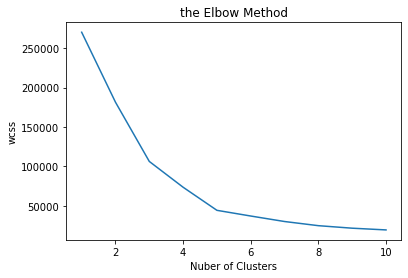

In [26]:
plt.plot (np.arange(1,10+1), wcss)
plt.title( 'the Elbow Method')
plt.xlabel('Nuber of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# 위의 차트를 보고 정하기
# 선이 가파르게 떨어지면 그룹화가 늘어났을 때 제대로 그룹화가 된 것
# 선이 완만해지면 그룹화가 더 되어도 큰 차이는 없고 세분화가 되어 지는 것
# 그러므로 위에서는 5가 좋아보임
# 그러면 이제 다시 K-means의 파라미터를 n_clusters=5 로 넣어주면서 인스턴스 시키자
# fit_predict(X) 를 시키면 됨

최적 결과로 다시 KMeans(n_clusters=) 하기

In [27]:
km = KMeans(n_clusters=5, init='k-means++', random_state=0)

.fit_predict(X)

In [28]:
y_km = km.fit_predict(X)

In [29]:
y_km

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [30]:
# 클러스터링이 되었으면 df에 추가해줘야 의미가 있음
df['Group'] = y_km

In [31]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [22]:
# 예를 들어 3번 그룹을 가져오자 하면 
df.loc[ df['Group']== 2, ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2
133,134,Female,31,72,71,2
135,136,Female,29,73,88,2
137,138,Male,32,73,73,2
139,140,Female,35,74,72,2
141,142,Male,32,75,93,2


scatter 차트그리기

In [41]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# 위의 X 판다스 df에서 
# np ndarray로 바꿔줌
# 차트그리기를 하기 위해서 

In [42]:
X = X.values

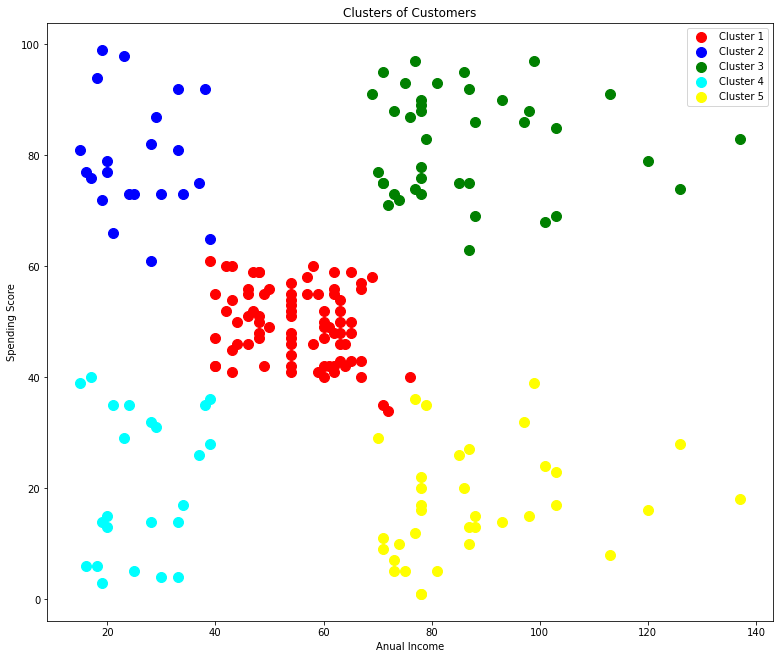

In [44]:
plt.figure(figsize=(13,11))
# kmean 0 그룹만 표시
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# kmean 1 그룹만 표시
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# kmean 2 그룹만 표시
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# kmean 3 그룹만 표시
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# kmean 4 그룹만 표시
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
# 위의 보조 색깔표시 (색깔이 어떤 cluster인지 표시)
plt.legend()
plt.show()